<a href="https://www.kaggle.com/code/osikanyiessandoh/california-housing-prices?scriptVersionId=116897141" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/california-housing-prices/housing.csv


**DATA CLEANING**

***1. EXPERIMENTATAL DATA ANALYSIS ON THE DATASET***

In [2]:
#laoding the dataset
df = pd.read_csv('/kaggle/input/california-housing-prices/housing.csv')
#to display the first snap shot of the dataset
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
#checking the shape to determine the number of rows and columns 
df.shape

(20640, 10)

The dataset has 20640 rows and 10 columns. This means we have 20640 individual records and 10 features about the dataset.

In [4]:
#checking the columns to determine the features of the dataset 
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

The 10 Features about the Datasets are 
1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t ocean/sea

In [5]:
#to investigate the data types in the dataset
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [6]:
#to have a general statistical summary of the datasets
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
#check for unique variables for the categorical variable ocean_proximity
df['ocean_proximity'].nunique()

5

In [8]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

There are 5 categorical variables for the ocean_proximity feature, namely:
1. Near Bay
2. 1H Ocean
3. Inland
4. Near Ocean
5. Island

A glance from the statistical summary shows that there are a number of missing values in the total bedroom columns

In [9]:
#to find the missing values in the dataset 
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

There are 207 missing values in the total_bedrooms column of the dataset.

In [10]:
#Dropping the rows with na values
df = df.dropna()

***2. EDA ANALYSIS ON DATASET WITH VISUALS***

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

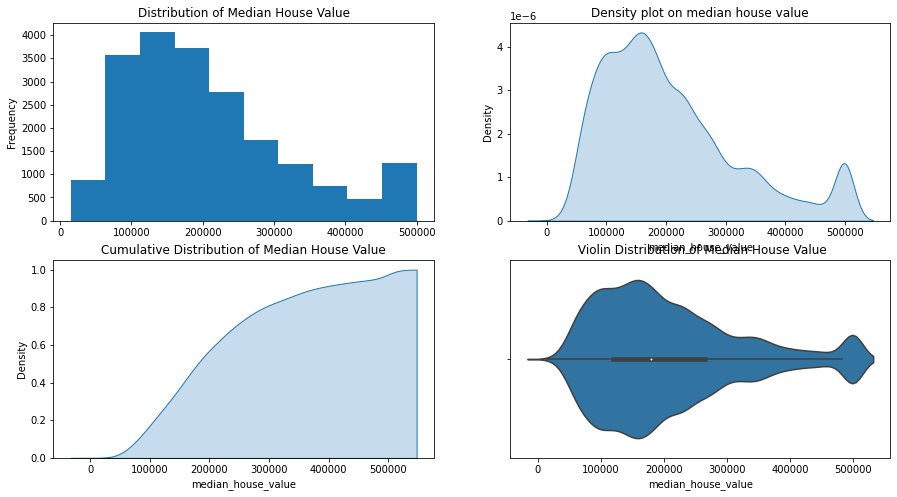

In [12]:
# Creating a figure and a set of subplots
fig, ax = plt.subplots(2, 2,  figsize=(15, 8))

# Ploting the first graph on the first subplot
df['median_house_value'].plot(kind='hist', ax=ax[0,0])
ax[0,0].set_title('Distribution of Median House Value')

# Ploting the second graph on the second subplot
sns.kdeplot(df['median_house_value'],shade=True, ax=ax[0,1])
ax[0,1].set_title('Density plot on median house value')

#Ploting the third graph on the third subplot
sns.kdeplot(df['median_house_value'], cumulative=True, shade=True, ax=ax[1,0])
ax[1,0].set_title('Cumulative Distribution of Median House Value')

#Ploting the fourth graph on the fourth subplot
sns.violinplot(x=df['median_house_value'], ax=ax[1,1])
ax[1,1].set_title(' Violin Distribution of Median House Value')

# Showing the figure
plt.show()


**Next we will investigate the relationship between the independent variables and the target variable**

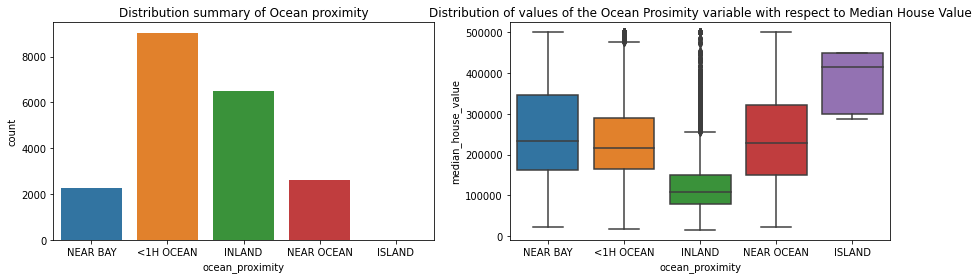

In [13]:
#ploting distribution and correlation of the categorical variable Ocean Proximity and target variable Median House Value
# Creating a figure and a set of subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 4))

# Ploting the first graph on the first subplot
#check the distribution of the categorical variable Ocean Proximity
sns.countplot(x='ocean_proximity', data=df, ax= ax[0])
ax[0].set_title('Distribution summary of Ocean proximity')

# Ploting the second graph on the second subplot
#Checking the distribution of values of the ocean_prosimity variable with respect to the target variable.
sns.boxplot(x='ocean_proximity', y='median_house_value', data=df, ax=ax[1])
ax[1].set_title('Distribution of values of the Ocean Prosimity variable with respect to Median House Value')
# Showing the figure
plt.show()

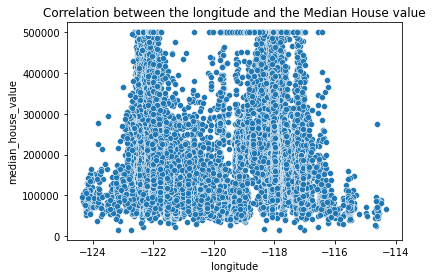

In [14]:
#checking for corelation between longitude and median_house_value
sns.scatterplot(x='longitude', y='median_house_value', data=df)
plt.title("Correlation between the longitude and the Median House value")
plt.show()


There seem to be no clear correlation between the longitude variable and the target variable.
Hence the feature will be droped from the dataset.

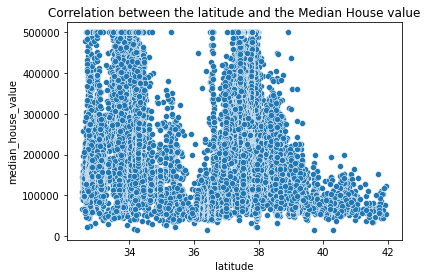

In [15]:
#checking for corelation between latitude and median_house_value
sns.scatterplot(x='latitude', y='median_house_value', data=df)
plt.title("Correlation between the latitude and the Median House value")
plt.show()

There seem to be no clear correlation between the latitude variable and the target variable.
Hence the feature will be droped from the dataset.

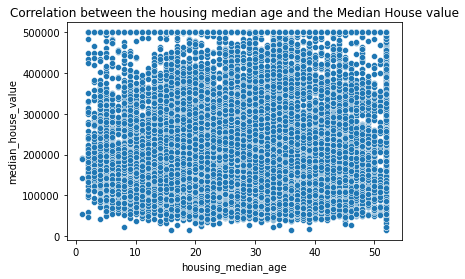

In [16]:
#checking for corelation between housing median_age and median_house_value
sns.scatterplot(x='housing_median_age', y='median_house_value', data=df)
plt.title("Correlation between the housing median age and the Median House value")
plt.show()

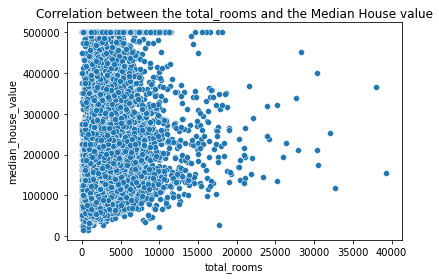

In [17]:
#checking for corelation between total rooms and median_house_value
sns.scatterplot(x='total_rooms', y='median_house_value', data=df)
plt.title("Correlation between the total_rooms and the Median House value")
plt.show()

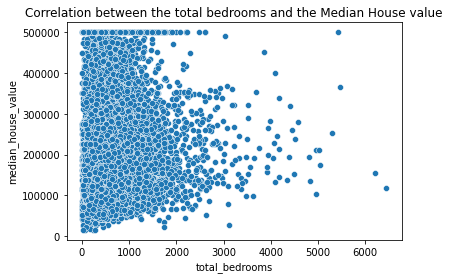

In [18]:
#checking for corelation between total_bedrooms and median_house_value
sns.scatterplot(x='total_bedrooms', y='median_house_value', data=df)
plt.title("Correlation between the total bedrooms and the Median House value")
plt.show()

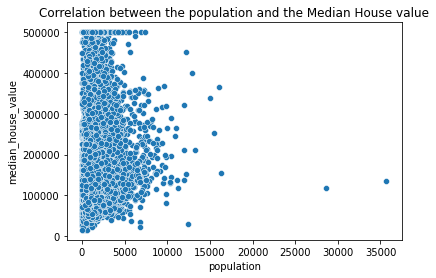

In [19]:
#checking for corelation between population and median_house_value
sns.scatterplot(x='population', y='median_house_value', data=df)
plt.title("Correlation between the population and the Median House value")
plt.show()

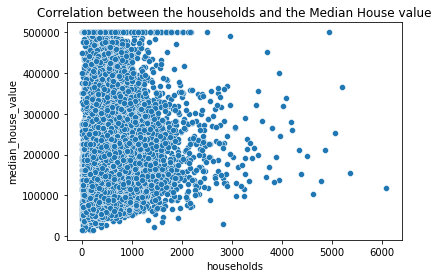

In [20]:
#checking for corelation between households and median_house_value
sns.scatterplot(x='households', y='median_house_value', data=df)
plt.title("Correlation between the households and the Median House value")
plt.show()

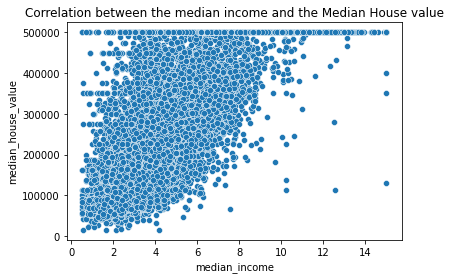

In [21]:
#checking for corelation between median income and median_house_value
sns.scatterplot(x='median_income', y='median_house_value', data=df)
plt.title("Correlation between the median income and the Median House value")
plt.show()

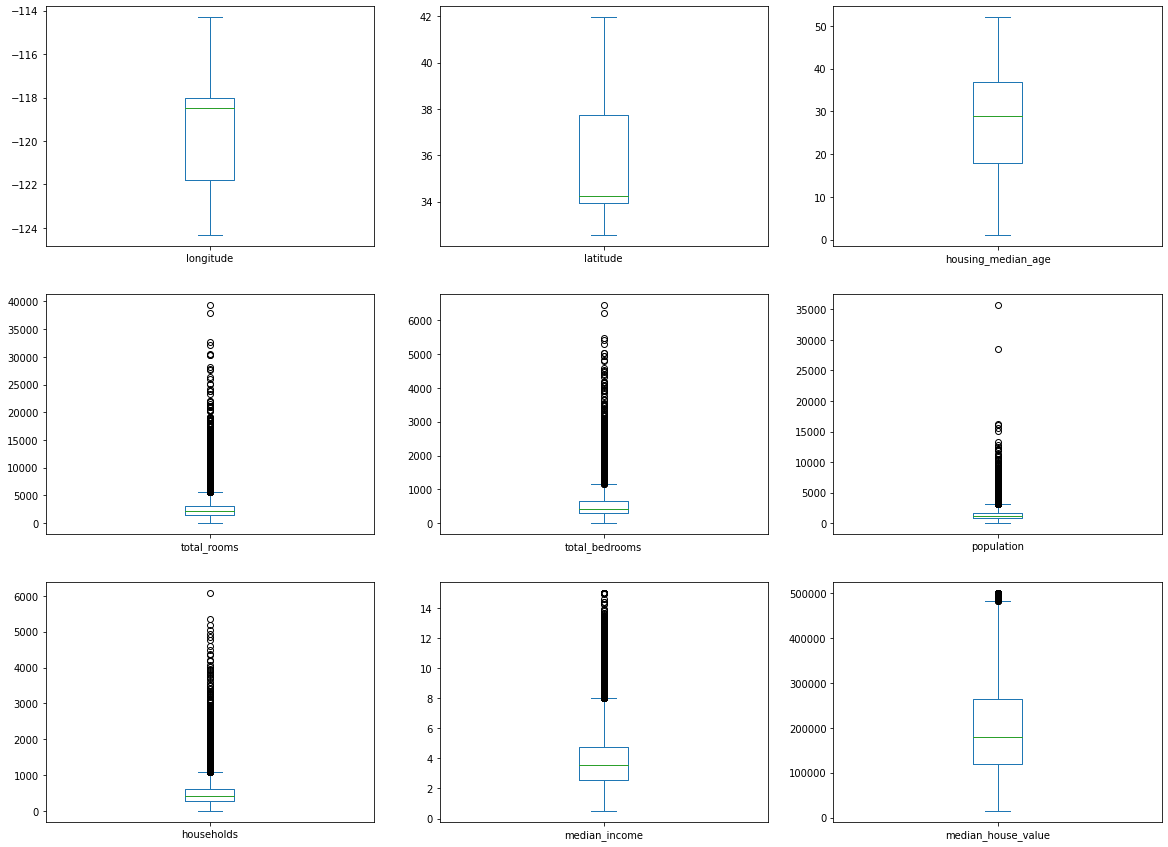

In [22]:
#checking for outliers in the distribution of the dataset
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(20,15))
plt.show()

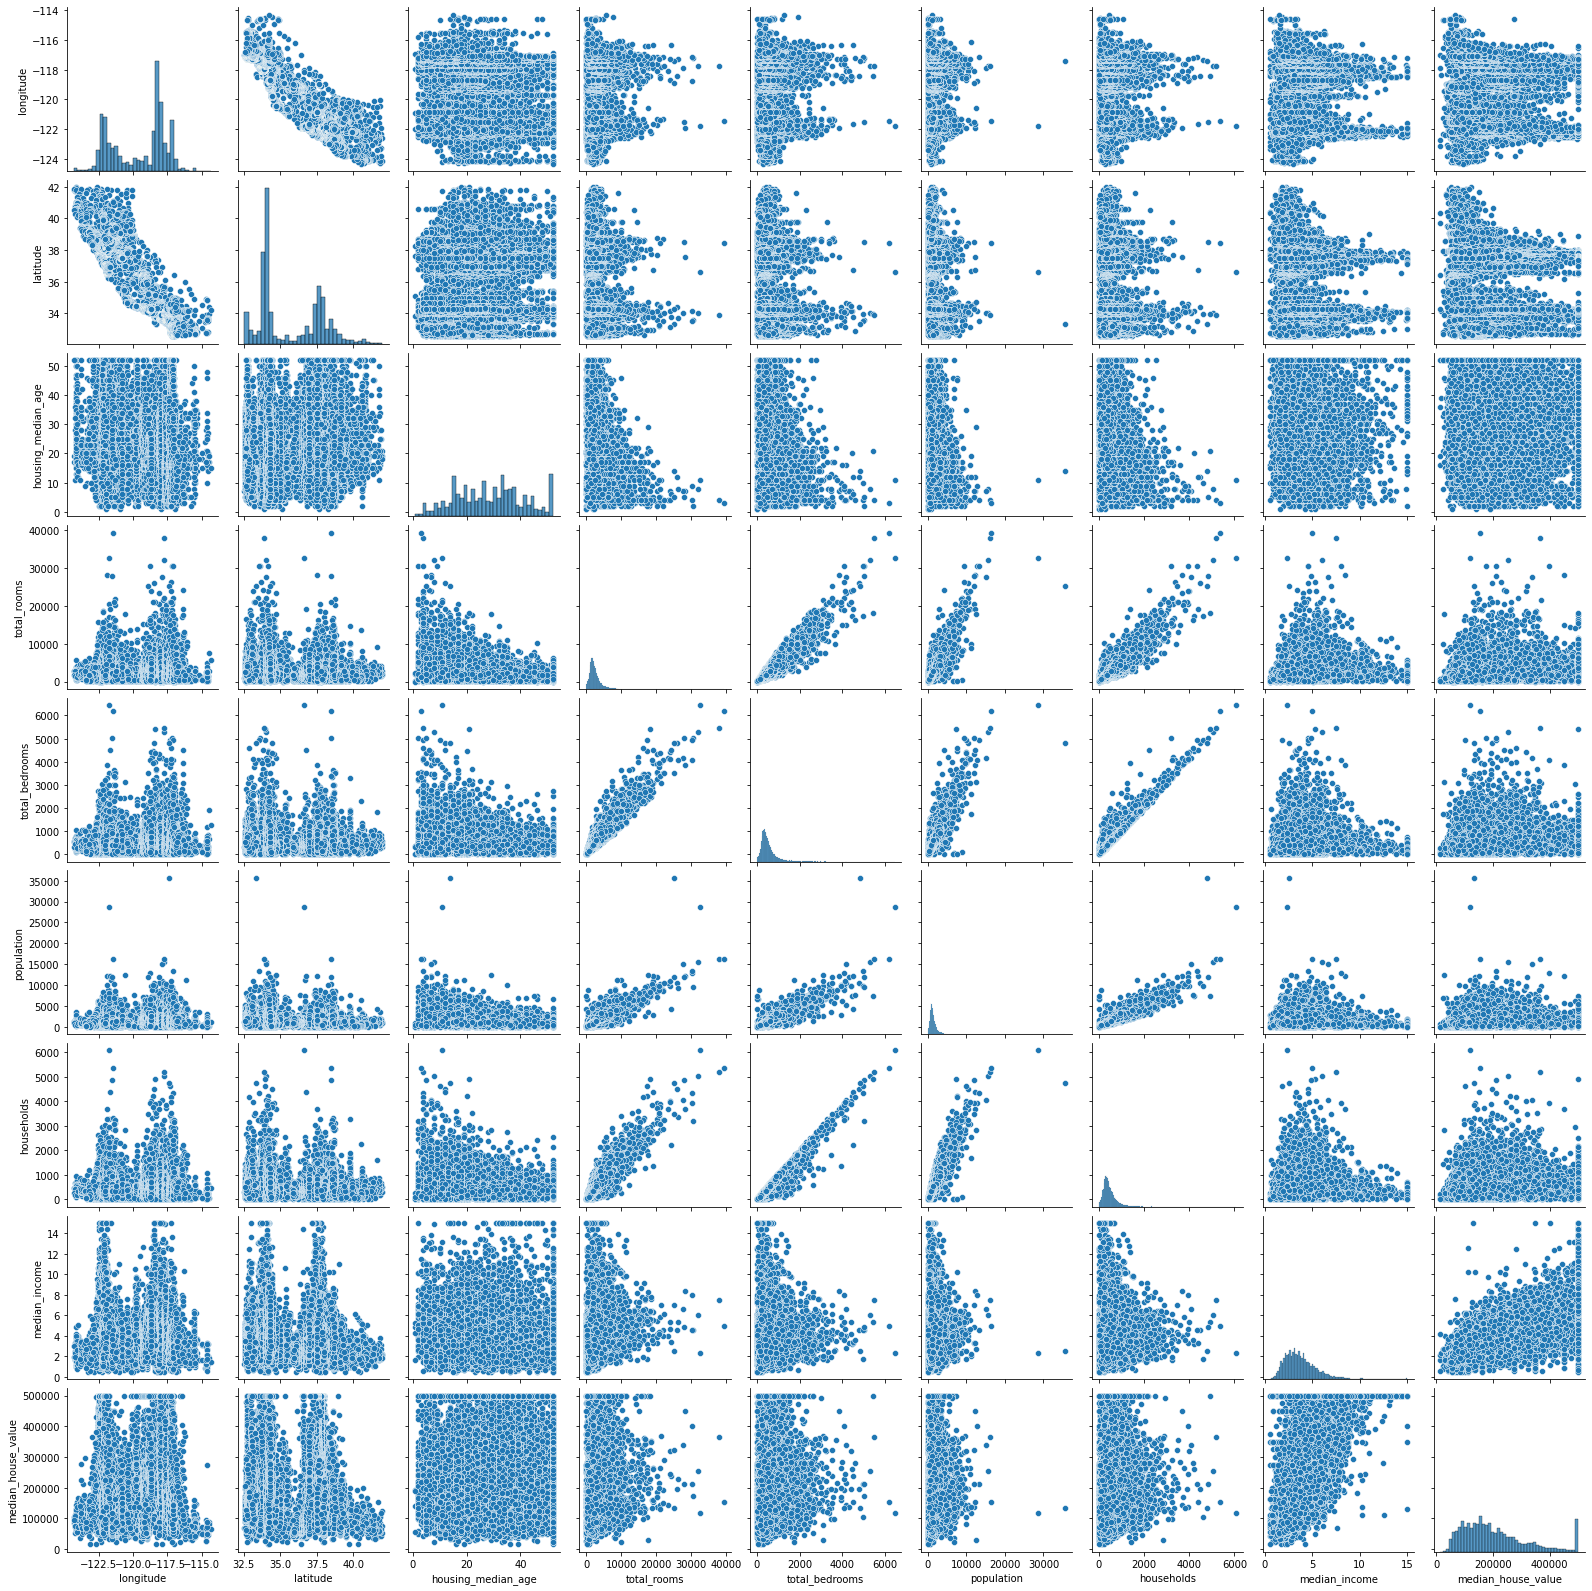

In [23]:
#checking for relationship between all varribales 
sns.pairplot(df)
plt.show()

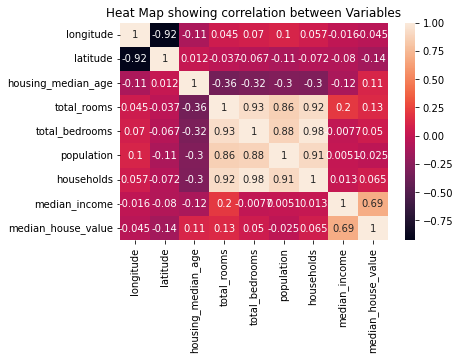

In [24]:
#correlation heat map
#this will inform extra decisions on the column to drop.
sns.heatmap(df.corr(), annot=True)
plt.title('Heat Map showing correlation between Variables')
plt.show()

This correlation Heat Map reveals a lot about the data set

1. The 'total_bedrooms' column represents the number of bedrooms in each house, it is highly correlated with the 'total_rooms' column which is more informative as it also includes other rooms in the house. Hence the 'total_bedrooms' column would be dropped.

2. The 'longitude' and 'latitude'columns : These columns contain the geographical coordinates of each house and while it may be useful to know the location of the house, it is not directly related to the price of the house. They have little or negative correlation to the target variable and hence won't be a good predictor of the target variable.

3. The households' column represents the number of households in each block, it may not be directly related to the price of the house. 

In [25]:
#drop columns that are so corellated with each other
#columns with correlation with others that is above 0.9 will be dropped
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
df = df.drop(to_drop, axis=1)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


In [26]:
#invesigating the columns that have been pulled down automatically
print(df.shape)
df.columns

(20433, 7)


Index(['longitude', 'housing_median_age', 'total_rooms', 'population',
       'median_income', 'median_house_value', 'ocean_proximity'],
      dtype='object')

1. Latitude, total bedrooms and households columns have been dropped since they have a correlation with another variable above 0.9 and offer less correlation to the target variable.
2. Additionally longitude column will be dropped.

In [27]:
#droping the longitute column
df = df.drop(['longitude'], axis=1)

In [28]:
df.head()

,housing_median_age,total_rooms,population,median_income,median_house_value,ocean_proximity
0,41.0,880.0,322.0,8.3252,452600.0,NEAR BAY
1,21.0,7099.0,2401.0,8.3014,358500.0,NEAR BAY
2,52.0,1467.0,496.0,7.2574,352100.0,NEAR BAY
3,52.0,1274.0,558.0,5.6431,341300.0,NEAR BAY
4,52.0,1627.0,565.0,3.8462,342200.0,NEAR BAY


**PREPROCESSING BEFORE MODELING OF DATASET**

In [29]:
#making dummy variables for the catergorcal variable ocean_proximity
df = pd.get_dummies(df, columns=['ocean_proximity']) # one-hot encoding

In [30]:
df.head(3)

,housing_median_age,total_rooms,population,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,41.0,880.0,322.0,8.3252,452600.0,0,0,0,1,0
1,21.0,7099.0,2401.0,8.3014,358500.0,0,0,0,1,0
2,52.0,1467.0,496.0,7.2574,352100.0,0,0,0,1,0


In [31]:
# Creating a dictionary with the old column names as keys and the new column names as values
column_names = {'housing_median_age': 'housing_median_age',
                'total_rooms': 'total_rooms',
                'population': 'population',
                'median_income': 'median_income',
                'median_house_value': 'median_house_value',
                'ocean_proximity_<1H OCEAN': '<1H OCEAN',
                'ocean_proximity_INLAND': 'INLAND',
                'ocean_proximity_ISLAND': 'ISLAND',
                'ocean_proximity_NEAR BAY': 'NEAR_BAY',
                'ocean_proximity_NEAR OCEAN': 'NEAR_OCEAN'}

# Rename the columns of the DataFrame
df = df.rename(columns=column_names)


In [32]:
df.head(3)

,housing_median_age,total_rooms,population,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR_BAY,NEAR_OCEAN
0,41.0,880.0,322.0,8.3252,452600.0,0,0,0,1,0
1,21.0,7099.0,2401.0,8.3014,358500.0,0,0,0,1,0
2,52.0,1467.0,496.0,7.2574,352100.0,0,0,0,1,0


In [33]:
#Standardizing the numerical columns. This is to ensure that all the columns have the same scale and unit.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['housing_median_age','total_rooms','population','median_income','median_house_value','<1H OCEAN','INLAND','ISLAND','NEAR_BAY','NEAR_OCEAN' ]] = scaler.fit_transform(df[['housing_median_age','total_rooms','population','median_income','median_house_value','<1H OCEAN','INLAND','ISLAND','NEAR_BAY','NEAR_OCEAN']])
df.head()

,housing_median_age,total_rooms,population,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR_BAY,NEAR_OCEAN
0,0.784314,0.022331,0.008941,0.539668,0.902266,0.0,0.0,0.0,1.0,0.0
1,0.392157,0.180503,0.067210,0.538027,0.708247,0.0,0.0,0.0,1.0,0.0
2,1.000000,0.037260,0.013818,0.466028,0.695051,0.0,0.0,0.0,1.0,0.0
3,1.000000,0.032352,0.015555,0.354699,0.672783,0.0,0.0,0.0,1.0,0.0
4,1.000000,0.041330,0.015752,0.230776,0.674638,0.0,0.0,0.0,1.0,0.0


'housing_median_age','total_rooms','population','median_income','median_house_value','<1H OCEAN','INLAND','ISLAND','NEAR_BAY','NEAR_OCEAN'

**MODELING OF DATASET TO GET A HOUSE PRICE/VALUE PREDICTOR**

In [34]:
#Importing model to split that datasets into a test and train set
from sklearn.model_selection import train_test_split

In [35]:
#defining our target variable and our features 
X = df.drop('median_house_value', axis=1) # features
y = df['median_house_value'] # target variable

In [36]:
#spliting the test with random 42 and  20% of the data for testing the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
# checking the shape of the training and testing sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(16346, 9) (4087, 9) (16346,) (4087,)


1. Linear Regression model

In [38]:
#importing the needed model 
from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression class
lin_reg = LinearRegression()

# Fit the model on the training data
lin_reg.fit(X_train, y_train)

LinearRegression()

In [39]:
# Making predictions on the test data
y_pred = lin_reg.predict(X_test)

In [40]:
#import of valuation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate the evaluation metrics
Linear_mse = mean_squared_error(y_test, y_pred)
Linear_mae = mean_absolute_error(y_test, y_pred)
Linear_r2 = r2_score(y_test, y_pred)
print(Linear_mse,Linear_mae,Linear_r2)

0.022551759478179483 0.1094025934018294 0.6120869291051526


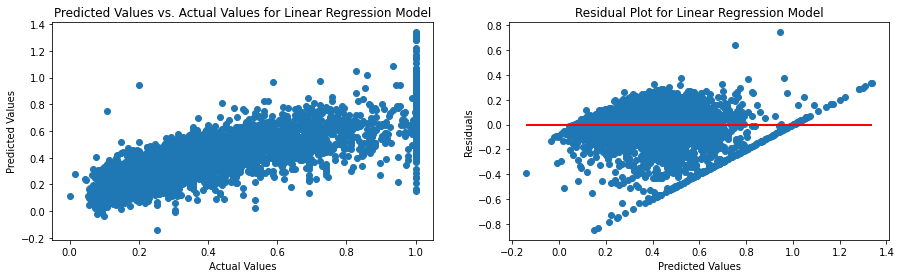

In [41]:
#Ploting the linear regression model
# Get the predictions for the test set
y_pred = lin_reg.predict(X_test)

# Creating a figure and a set of subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 4))

# Create a scatter plot of the predicted values against the actual values
ax[0].scatter(y_test, y_pred)
ax[0].set_xlabel('Actual Values')
ax[0].set_ylabel('Predicted Values')
ax[0].set_title('Predicted Values vs. Actual Values for Linear Regression Model')


# Create a scatter plot of the residuals
ax[1].scatter(y_pred, y_pred - y_test)
ax[1].set_xlabel('Predicted Values')
ax[1].set_ylabel('Residuals')
ax[1].set_title('Residual Plot for Linear Regression Model')
ax[1].hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), lw=2, color='red')
plt.show()

2. Decision Tree Regressor

In [42]:
#importing the needed model
from sklearn.tree import DecisionTreeRegressor

# Create an instance of the DecisionTreeRegressor class
dt_reg = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [43]:
# Make predictions on the test data
y_pred_TR = dt_reg.predict(X_test)

In [44]:
# Calculate the evaluation metrics
TR_mse = mean_squared_error(y_test, y_pred_TR)
TR_mae = mean_absolute_error(y_test, y_pred_TR)
TR_r2 = r2_score(y_test, y_pred_TR)
print (TR_mse, TR_mae, TR_r2)

0.03582437064262211 0.1308431090222843 0.3837845937342095


In [45]:
#remodeling with the aim of improving the r2 score as it's low and means model is overfitted
#reducing the number of depth of true called pruning
dt_reg_prune = DecisionTreeRegressor(max_depth=6, random_state=42)
dt_reg_prune.fit(X_train, y_train)
# Make predictions on the test data
y_pred_prune = dt_reg_prune.predict(X_test)
# Calculate the evaluation metrics
TR_prune_mse = mean_squared_error(y_test, y_pred_prune)
TR_prune_mae = mean_absolute_error(y_test, y_pred_prune)
TR_prune_r2 = r2_score(y_test, y_pred_prune)

print(TR_prune_mse,TR_prune_mae, TR_prune_r2)

0.022377001090564924 0.10600226271705253 0.6150929501151667


In [46]:
#Additional we can specify the sample leaf to improve the r2 score
dt_reg_sample = DecisionTreeRegressor(min_samples_leaf=10, max_depth=6, random_state=42)
dt_reg_sample.fit(X_train, y_train)
# Make predictions on the test data
y_pred_sample = dt_reg_sample.predict(X_test)
# Calculate the evaluation metrics
TR_sample_mse = mean_squared_error(y_test, y_pred_sample)
TR_sample_mae = mean_absolute_error(y_test, y_pred_sample)
TR_sample_r2 = r2_score(y_test, y_pred_sample)

print(TR_sample_mse,TR_sample_mae, TR_sample_r2)

0.022207304318587348 0.10579884154345778 0.6180119062171268


In [47]:
#we want to find the best parameters to improve the r2 score
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': [3, 4, 5], 'min_samples_leaf': [3, 4, 5]}
dt_reg = DecisionTreeRegressor()
dt_reg_cv = GridSearchCV(dt_reg, param_grid, cv=5)
dt_reg_cv.fit(X_train, y_train)
print(dt_reg_cv.best_params_)

{'max_depth': 5, 'min_samples_leaf': 5}


In [48]:
#inputing the best value to the model 
dt_reg_final = DecisionTreeRegressor(min_samples_leaf=3, max_depth=5, random_state=42)
dt_reg_final.fit(X_train, y_train)
# Make predictions on the test data
y_pred_TR_final = dt_reg_final.predict(X_test)
# Calculate the evaluation metrics
TR_final_mse = mean_squared_error(y_test, y_pred_TR_final)
TR_final_mae = mean_absolute_error(y_test, y_pred_TR_final)
TR_final_r2 = r2_score(y_test, y_pred_TR_final)

print(TR_final_mse,TR_final_mae, TR_final_r2)

0.022366573297034013 0.10687845525871545 0.6152723187101161


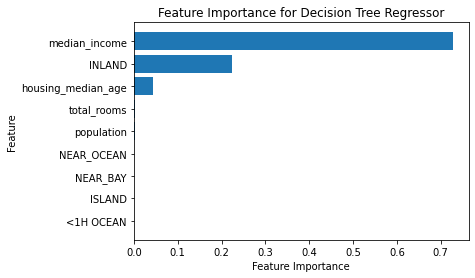

In [49]:
#Ploting the Decision Tree regessor
# Get the feature importances
importances = dt_reg_final.feature_importances_

# Get the indices of the sorted feature importances
sorted_index = np.argsort(importances)

# Plot the feature importances
plt.barh(range(X_train.shape[1]), importances[sorted_index])
plt.yticks(range(X_train.shape[1]), X_train.columns[sorted_index])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Decision Tree Regressor')
plt.show()


3. Random Forest Regressor

In [50]:
#Importing the model
from sklearn.ensemble import RandomForestRegressor

# Create an instance of the RandomForestRegressor class
rf_reg = RandomForestRegressor()

# Fit the model on the training data
rf_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred_Random = rf_reg.predict(X_test)

# Calculate the evaluation metrics
RandomForest_mse = mean_squared_error(y_test, y_pred_Random)
RandomForest_mae = mean_absolute_error(y_test, y_pred_Random)
RandomForest_r2 = r2_score(y_test, y_pred_Random)

print(RandomForest_mse,RandomForest_mae, RandomForest_r2)

0.019221914532588927 0.09704210192128368 0.66936362982988


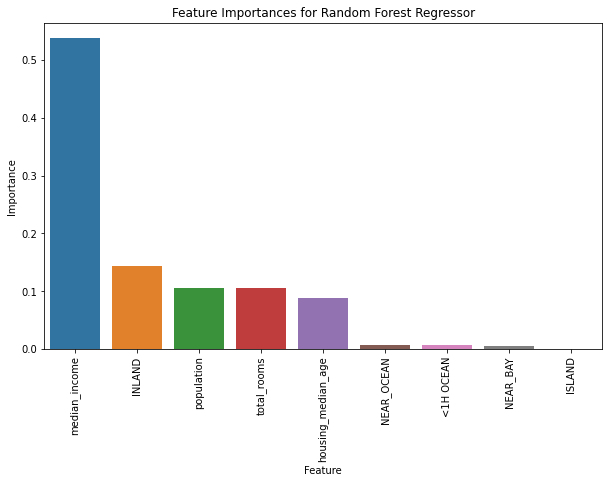

In [51]:
# Get the feature importances
importances = rf_reg.feature_importances_

# Create a list of the feature names
feature_names = X_train.columns

# Create a DataFrame of the feature importances
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Sort the DataFrame by the 'importance' column
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10,6))
sns.barplot(x='feature', y='importance', data=feature_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances for Random Forest Regressor')
plt.xticks(rotation=90)
plt.show()

4. Gradient Boost Regressor

In [52]:
from sklearn.ensemble import GradientBoostingRegressor

# Create an instance of the GradientBoostingRegressor class
gb_reg = GradientBoostingRegressor()

# Fit the model on the training data
gb_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gb = gb_reg.predict(X_test)

# Calculate the evaluation metrics
gb_mse = mean_squared_error(y_test, y_pred_gb)
gb_mae = mean_absolute_error(y_test, y_pred_gb)
gb_r2 = r2_score(y_test, y_pred_gb)

print(gb_mse,gb_mae, gb_r2)

0.019207875420332834 0.0981231306675638 0.6696051167592332


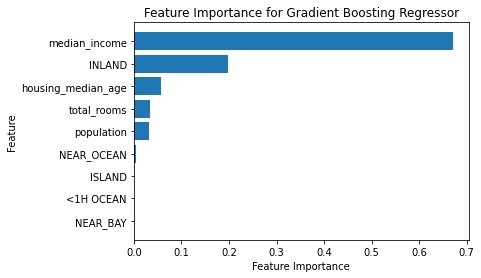

In [53]:
# Get the feature importances
importances = gb_reg.feature_importances_

# Get the indices of the sorted feature importances
sorted_index = np.argsort(importances)

# Plot the feature importances
plt.barh(range(X_train.shape[1]), importances[sorted_index])
plt.yticks(range(X_train.shape[1]), X_train.columns[sorted_index])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Gradient Boosting Regressor')
plt.show()

In [54]:
from sklearn.linear_model import Ridge

# Create an instance of the Ridge class
ridge_reg = Ridge()

# Fit the model on the training data
ridge_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred_ridge = ridge_reg.predict(X_test)

# Calculate the evaluation metrics
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_mae = mean_absolute_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)

print(ridge_mse,ridge_mae, ridge_r2)

0.022595327918968785 0.1093779594691686 0.6113375078603477


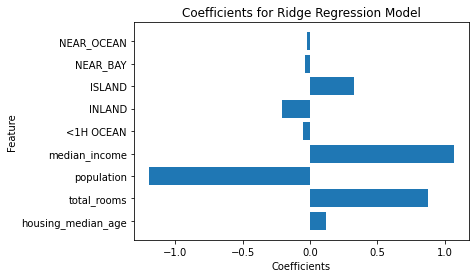

In [55]:
# Get the coefficients
coefs = ridge_reg.coef_

# Plot the coefficients
plt.barh(range(X_train.shape[1]), coefs)
plt.yticks(range(X_train.shape[1]), X_train.columns)
plt.xlabel('Coefficients')
plt.ylabel('Feature')
plt.title('Coefficients for Ridge Regression Model')
plt.show()


**Table showing the errrors of all the developed models.

In [56]:
# Create a dictionary with the error values for each model
errors = {'Linear': [Linear_mse, Linear_mae, Linear_r2], 
          'Decision Tree': [TR_final_mse, TR_final_mae, TR_final_r2], 
          'Random Forest': [RandomForest_mse, RandomForest_mae, RandomForest_r2],
          'Gradient Boost': [gb_mse, gb_mae, gb_r2],
          'Ridge': [ridge_mse, ridge_mae, ridge_r2]
         }

# Create a dataframe from the dictionary
df_errors = pd.DataFrame(errors, index=['MSE', 'MAE', 'R2'])

# Display the dataframe
print(df_errors)


       Linear  Decision Tree  Random Forest  Gradient Boost     Ridge
MSE  0.022552       0.022367       0.019222        0.019208  0.022595
MAE  0.109403       0.106878       0.097042        0.098123  0.109378
R2   0.612087       0.615272       0.669364        0.669605  0.611338


**PLOT OF ALL THE ERRORS FOR EACH MODEL

<Figure size 1440x720 with 0 Axes>

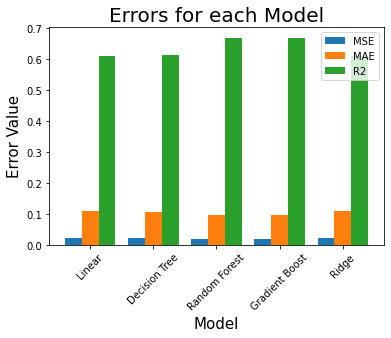

In [57]:
# Set the figure size
plt.figure(figsize=(20, 10))

# Create a bar plot of the errors
df_errors.T.plot(kind='bar', rot=45, width=0.8)

# Add a title and labels for the axes
plt.title('Errors for each Model', fontsize=20)
plt.xlabel('Model', fontsize=15)
plt.ylabel('Error Value', fontsize=15)

# Show the plot
plt.show()


Clearly the radom forest Model is the best Model for this datset